In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

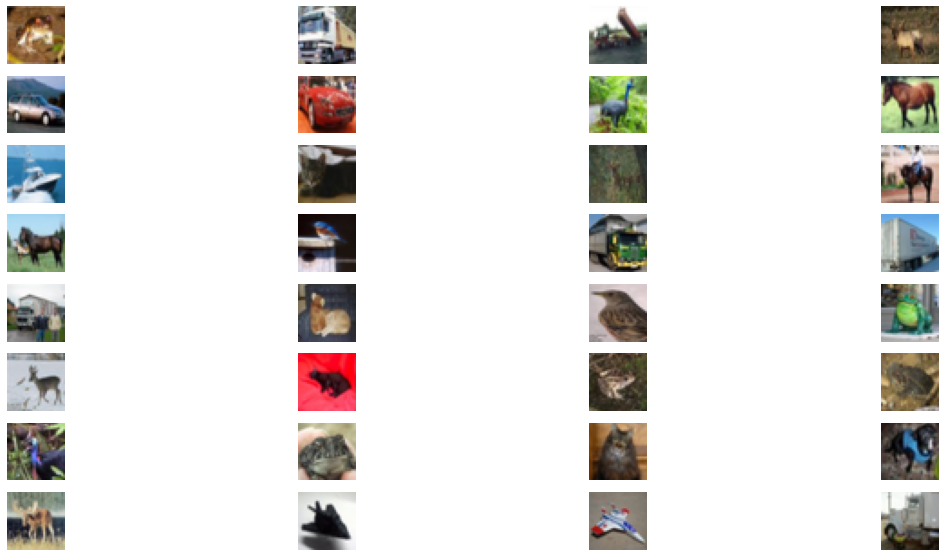

In [ ]:
plt.figure(figsize = (20,10))
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.imshow(x_train[i])
  plt.axis("off")
  

In [ ]:
labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
labels[9]

'truck'

In [ ]:
x_train = x_train/255
x_test = x_test /255

### CNN Model Building

In [ ]:
cnn = models.Sequential([
    ## CNN
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    ## another set of pooling
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [ ]:
cnn.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5012 - accuracy: 0.4581
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1393 - accuracy: 0.5966
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9962 - accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9109 - accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8467 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7924 - accuracy: 0.7240
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7408 - accuracy: 0.7416
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6996 - accuracy: 0.7554
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6642 - accuracy: 0.7688
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [ ]:
cnn_prediction = cnn.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [ ]:
cnn_prediction2 = [np.argmax(cnn.predict(x_test[i].reshape(1,32,32,3))) for i in range(10000)]

In [ ]:
y_test[1]

array([8], dtype=uint8)

In [ ]:
dic={}
ans=[]
for i in range(len(labels)):
    dic[i]= labels[i]
for i in range(len(cnn_prediction)):
    arr=np.array([cnn_prediction2[i], cnn_prediction2[i], cnn_prediction2[i], cnn_prediction2[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

In [ ]:
np.array([cnn_prediction2[1], cnn_prediction2[1], cnn_prediction2[1], cnn_prediction2[1]])

array([8, 8, 8, 8])

In [ ]:
np.savetxt(fname="cifar_cnn2.csv", X=ans, delimiter=',', fmt="%s")